In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib import rc
from matplotlib.ticker import LogFormatter
from math import log, exp, sqrt, pow

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

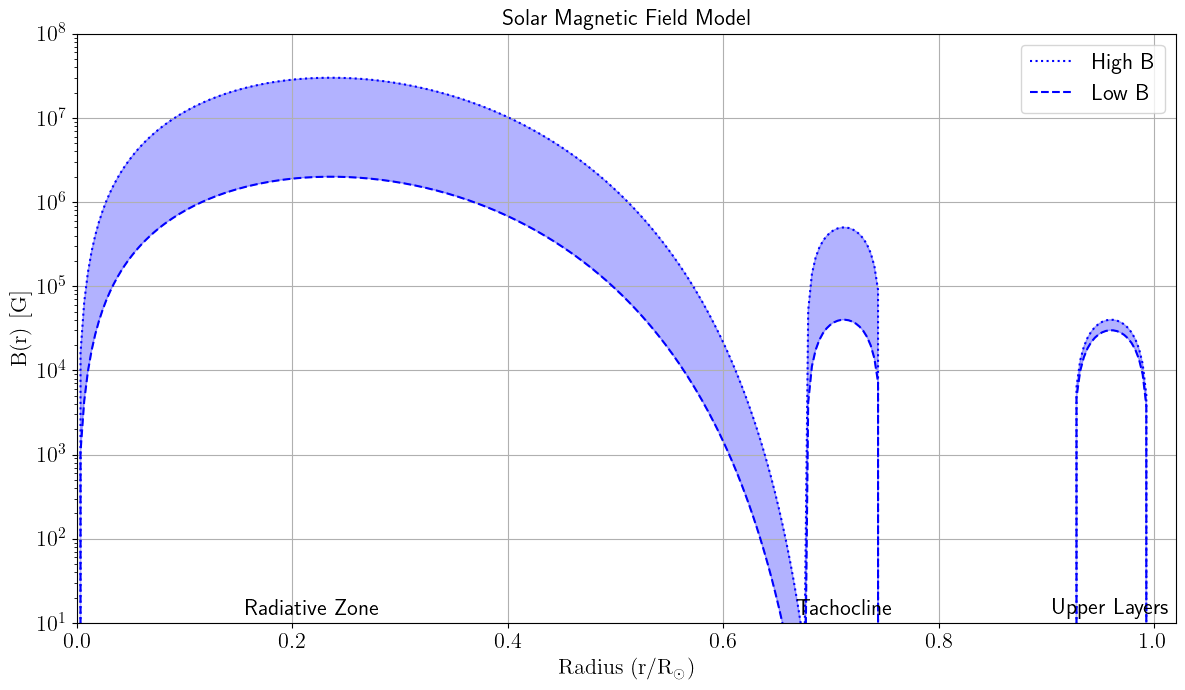

In [107]:
Rsun = 6.957*1e10 # cm
Rrad = 0.712 
Rtach = 0.712 
Rupper=0.96
dtach = 0.035 
dupper = 0.035 

# Brad=2*1e6
# Btach=4*1e4
# Bupper=3*1e4
Blow = [2*1e6, 4*1e4, 3*1e4]  # Brad, Btach, Bupper
Bhigh = [30*1e6, 50*1e4, 4*1e4]

def Bsolar(r, B):
    """
    Calculate the magnetic field strength at a given radius in the solar atmosphere.
    
    Parameters:
    r (float): Radius in cm.
    
    Returns:
    float: Magnetic field strength in Gauss.
    """
    if np.abs(r-Rtach) < dtach:
        return B[1] * (1 - np.power((r-Rtach) / dtach, 2) )

    elif r < Rrad:
        lambda1 = 10*Rrad+1
        return B[0]*(1+lambda1)*pow(1+1/lambda1, lambda1)*pow(r/Rrad, 2.0)*pow(1-(r/Rrad)**2, lambda1)
    
    elif np.abs(r-Rupper) < dupper:
        return B[2] * (1 - np.power((r-Rupper) / dupper, 2) )
    
    else:
        return 0.0
    
Bsolar_Blow = np.vectorize(lambda r: Bsolar(r, Blow))
Bsolar_Bhigh = np.vectorize(lambda r: Bsolar(r, Bhigh))

radius = np.linspace(0, 1.02, 300)
Blow_vals = Bsolar_Blow(radius)
Bhigh_vals = Bsolar_Bhigh(radius)

plt.figure(figsize=(12, 7))  # inches
plt.plot(radius, Bhigh_vals, color='blue', linestyle=':', label='High B')
plt.plot(radius, Blow_vals, color='blue', linestyle='--', label='Low B')
plt.fill_between(radius, Blow_vals, Bhigh_vals, color='blue', alpha=0.3)
# plt.scatter(0.712, 1e4, color='red', marker='o', label='Tachocline')
plt.text(0.22, 11, 'Radiative Zone', fontsize=16, color='black', ha='center', va='bottom')
plt.text(0.712, 11, 'Tachocline', fontsize=16, color='black', ha='center', va='bottom')
plt.text(0.96, 11, 'Upper Layers', fontsize=16, color='black', ha='center', va='bottom')
plt.xlabel(r'${\rm Radius~(r/R_\odot)}$', fontsize=16)
plt.ylabel(r'${\rm B(r)~[G]}$', fontsize=16)
plt.title('Solar Magnetic Field Model',fontsize=16)
plt.xlim(0, 1.02)
plt.ylim(10, 1e8)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=16, loc='upper right')
plt.tight_layout()
plt.savefig('Bsolar.pdf')   
plt.show()

In [ ]:
hbar  = 6.582119569e-19 # Planck's constant  [keV s]
cs    = 2.99792458e10   # speed of light     [cm/s]
hbarc = hbar*cs         #                    [keV*cm]
me    = 511.            # Electron mass      [keV]
RSun  = 6.9634e10       # Solar radius       [cm]
pi4   = 4.*np.pi
alpha = 1./137.036      # Fine-structure constant
ne    = 1.06051586e+23  # Electron number density [cm^-3]

def number_density(r):
    """
    Calculate the electron number density at a given radius in the solar atmosphere.
    
    Parameters:
    r (float): Radius in cm.
    
    Returns:
    float: Electron number density in cm^-3.
    """
    if r < Rrad:
        return 1.0e23 * (1.0 - np.power(r/Rrad, 2.0))**2
    elif np.abs(r-Rtach) < dtach:
        return 1.0e23 * (1.0 - np.power((r-Rtach)/dtach, 2.0))
    elif np.abs(r-Rupper) < dupper:
        return 1.0e23 * (1.0 - np.power((r-Rupper)/dupper, 2.0))
    else:
        return 0.0

omPl2 = pi4*alpha*ne*hbarc**3/me

/tmp/ipykernel_11194/961597816.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16, loc='lower right')


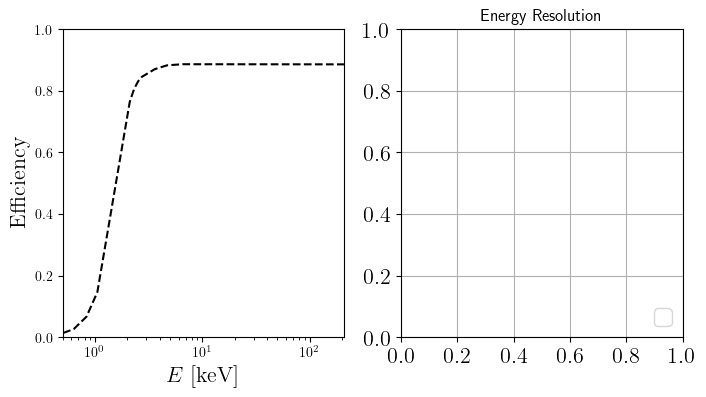

In [135]:
data_path = "/home/yuangw/Desktop/chameleons/2103.15834/data/"
fE = data_path+'efficiency.csv'
fs = data_path+'sigmaevsE.txt'

# Define the efficiency of the XENON1T detector vs energy in keV
# See the XENON paper 2006.09721 Fig.2 
ekeV, eff = np.loadtxt(fE, dtype='f8', delimiter = ',', usecols=(0,1), unpack=True)
epsilon   = interpolate.interp1d(ekeV, eff, fill_value=(0.,0.89), bounds_error=False)

pi2 = np.pi**2
# Energy resolution; sgm is from XENON paper 2006.09721 Eq.1; om in keV
def res_sgm(omR, om):
    sgm = 0.31*np.sqrt(omR) + 0.0037*omR # in keV
    return np.exp(-0.5*(om-omR)**2/sgm**2)/np.sqrt(pi2)/sgm

fig, axs = plt.subplots(1,2, figsize=(8, 4))  # inches

axs[0].plot(ekeV, epsilon(ekeV), color='black', linestyle='--', label=r'XENON1T Efficiency')
axs[0].set_xlabel(r'$E~ {\rm [keV]}$', fontsize=16)
axs[0].set_ylabel(r'${\rm Efficiency}$', fontsize=16)
axs[0].set_xlim(0.5, 210)
axs[0].set_ylim(0, 1)
axs[0].set_xscale('log')

# res_sgm_vec = np.vectorize(res_sgm(omega0, ekeV))
# axs[1].plot(ekeV, res_sgm_vec, color='black', linestyle='--', label=r'XENON1T Resolution')
axs[1].set_title('Energy Resolution')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')
plt.grid()
plt.show()

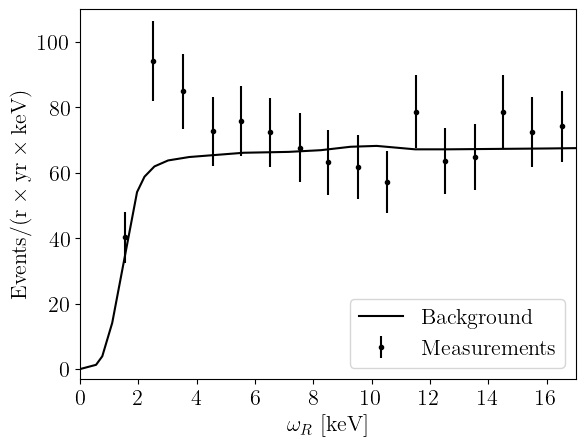

In [115]:
data_path = "/home/yuangw/Desktop/chameleons/2103.15834/data/"
fC = data_path+'Central.csv'
fL = data_path+'Lower.csv'
fU = data_path+'Upper.csv'
fS = data_path+'Signal.csv'


## Read the XENON1T data and define the central deviation
xd, yC = np.loadtxt(fC, dtype='f8', delimiter = ',', usecols=(0,1), unpack=True)
xd, yL = np.loadtxt(fL, dtype='f8', delimiter = ',', usecols=(0,1), unpack=True)
xd, yU = np.loadtxt(fU, dtype='f8', delimiter = ',', usecols=(0,1), unpack=True)
sigD = (yU-yL)/2.


# Define the function giving the XENON1T background vs energy in keV
enb, backb = np.loadtxt(fS, dtype='f8', delimiter = ',', usecols=(0,1), unpack=True)
back = interpolate.interp1d(enb, backb, fill_value=(0.0, 0.0), bounds_error=False)

plt.plot(enb, back(enb), color='black', linestyle='-', label=r'${\rm Background}$')
plt.errorbar(xd, yC, yerr=sigD, xerr=None, fmt='.k', label=r'${\rm Measurements}$')
plt.xlabel(r'$\omega_R~{\rm [keV]}$', fontsize=16)
plt.ylabel(r'${\rm Events}/({\rm r}\times {\rm yr} \times {\rm keV})$', fontsize=16)
plt.xlim(0, 17)
plt.ylim(-3, 110)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')
plt.show()